<a href="https://colab.research.google.com/github/prince-musonda/100-days-of-web-development/blob/main/multiclassfication_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from torch import nn
import torch

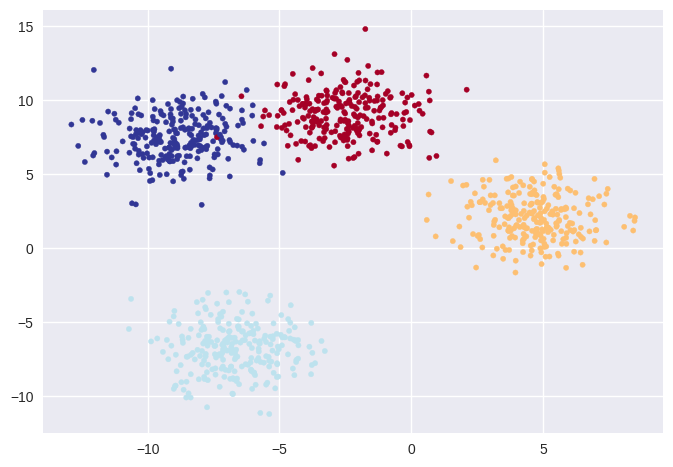

In [78]:
# load data

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples = 1000, n_features=NUM_FEATURES,centers=NUM_CLASSES,random_state=RANDOM_SEED, cluster_std=1.5)

plt.scatter(X_blob[:,0],X_blob[:,1], c=y_blob, s=14, cmap=plt.cm.RdYlBu)

# split data and convent to tensors that run on GPU

In [79]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X_blob = torch.from_numpy(X_blob).to(device).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor).to(device)

X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob)
len(X_train), len(y_train)

(750, 750)

**Build model**

In [106]:
class BlobModel(nn.Module):
  def __init__(self, in_features, out_features, hidden_units):
    super().__init__()
    self.stack = nn.Sequential(
        nn.Linear(in_features = in_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=out_features)
    )

  def forward(self,x:torch.tensor)-> torch.Tensor:
    return self.stack(x)



In [107]:
torch.manual_seed(42)
model_1 = BlobModel(in_features=2, out_features=4,hidden_units=8)

In [108]:
# lets make a prediction with untrained model
y_logits = model_1(X_train)[:4]
print(y_logits)
print(torch.softmax(y_logits,dim=1))

tensor([[-0.3175, -0.1253,  0.1821,  0.2071],
        [-0.3124, -0.2372,  0.2952,  0.2379],
        [-0.3972, -0.0522,  0.2163,  0.2028],
        [-0.3120, -0.1085,  0.2153,  0.1848]], grad_fn=<SliceBackward0>)
tensor([[0.1802, 0.2184, 0.2970, 0.3045],
        [0.1771, 0.1909, 0.3251, 0.3070],
        [0.1644, 0.2322, 0.3037, 0.2996],
        [0.1797, 0.2203, 0.3046, 0.2954]], grad_fn=<SoftmaxBackward0>)


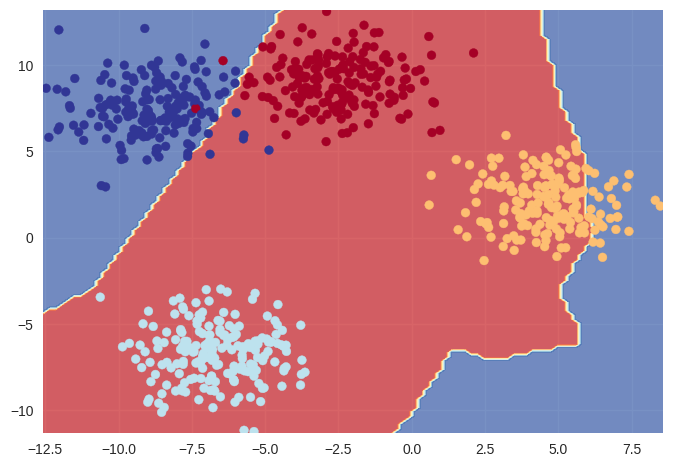

In [109]:
# set up helper function for visualization

from helper_functions import plot_decision_boundary
plot_decision_boundary(model_1, X_train, y_train)

# **Time to train the model**

In [111]:
def accuracy(y_pred, y_true):
  correct = torch.eq(y_pred,y_true).sum().item()
  accuracy = correct/len(y_pred)
  return accuracy

# set up loss function
loss_fn = nn.CrossEntropyLoss()
# set up optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

for epoch in range(1000):
  #### training loop ##########
  model_1.train()
  # calculate loss
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits, y_train)
  # zero grad
  optimizer.zero_grad()
  # perform back propagation
  loss.backward()
  #update parameters
  optimizer.step()
  #calculate train accuracy
  train_accuracy = accuracy(y_pred=y_pred, y_true=y_train)

  ##### testting loop#########
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # calculate loss
    test_loss = loss_fn(test_logits, y_test)
    # test accuracy
    test_accuracy = accuracy(y_pred=y_pred, y_true=y_train)

  if(epoch % 1 == 0):
    print(f'accuracy: {test_accuracy:.2f}')





accuracy: 0.60
accuracy: 0.61
accuracy: 0.62
accuracy: 0.62
accuracy: 0.62
accuracy: 0.63
accuracy: 0.63
accuracy: 0.64
accuracy: 0.65
accuracy: 0.65
accuracy: 0.66
accuracy: 0.66
accuracy: 0.66
accuracy: 0.66
accuracy: 0.66
accuracy: 0.67
accuracy: 0.67
accuracy: 0.67
accuracy: 0.68
accuracy: 0.68
accuracy: 0.69
accuracy: 0.69
accuracy: 0.69
accuracy: 0.69
accuracy: 0.69
accuracy: 0.70
accuracy: 0.70
accuracy: 0.70
accuracy: 0.70
accuracy: 0.70
accuracy: 0.70
accuracy: 0.71
accuracy: 0.71
accuracy: 0.71
accuracy: 0.71
accuracy: 0.72
accuracy: 0.72
accuracy: 0.73
accuracy: 0.74
accuracy: 0.75
accuracy: 0.75
accuracy: 0.76
accuracy: 0.76
accuracy: 0.77
accuracy: 0.79
accuracy: 0.80
accuracy: 0.81
accuracy: 0.81
accuracy: 0.82
accuracy: 0.83
accuracy: 0.84
accuracy: 0.85
accuracy: 0.86
accuracy: 0.87
accuracy: 0.87
accuracy: 0.87
accuracy: 0.88
accuracy: 0.88
accuracy: 0.89
accuracy: 0.90
accuracy: 0.90
accuracy: 0.91
accuracy: 0.91
accuracy: 0.91
accuracy: 0.92
accuracy: 0.92
accuracy: 

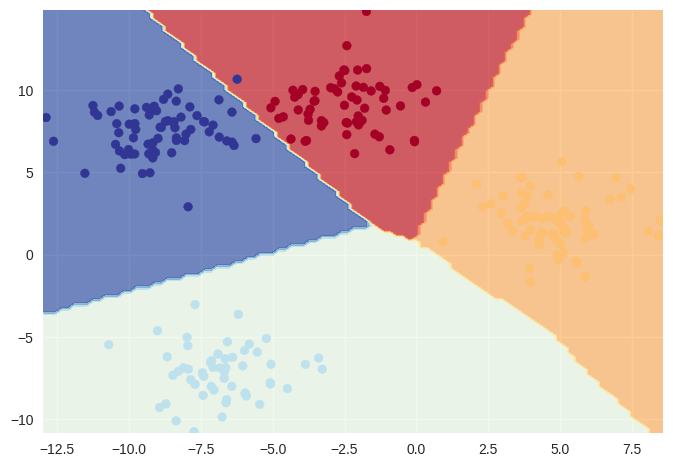

In [113]:
plot_decision_boundary(model_1, X_test,y_test)

In [116]:
y_test[3]


tensor(1)

In [ ]:
12